Базова модель:
MSE (навчальна вибірка): 0.5179
R^2 (навчальна вибірка): 0.6126
MSE (тестова вибірка): 0.5559
R^2 (тестова вибірка): 0.5758

Ridge регресія:
MSE (навчальна вибірка): 0.5179
MSE (тестова вибірка): 0.5559
R^2 (навчальна вибірка): 0.6126
R^2 (тестова вибірка): 0.5758

Lasso регресія:
MSE (навчальна вибірка): 1.3368
MSE (тестова вибірка): 1.3107
R^2 (навчальна вибірка): 0.0000
R^2 (тестова вибірка): -0.0002


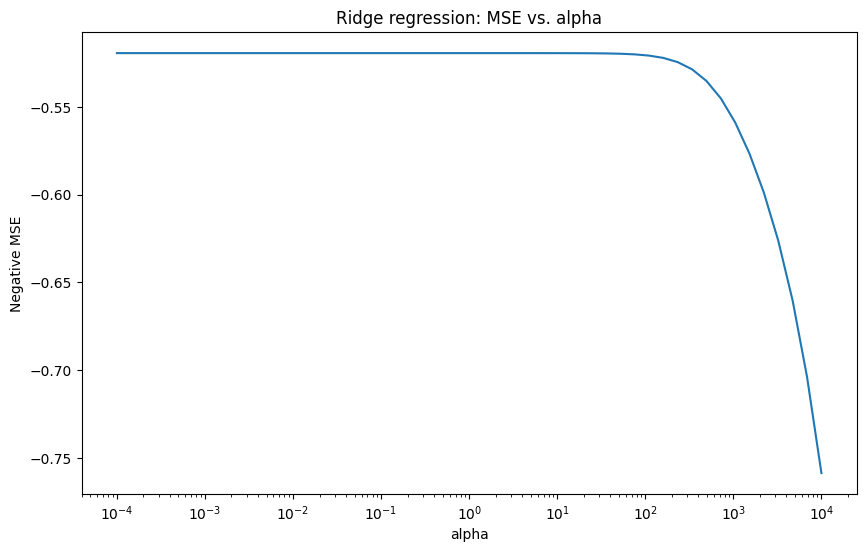


Оптимальне значення alpha для Ridge регресії: 0.1265

Фінальна модель (Ridge з оптимальним alpha):
MSE (навчальна вибірка): 0.5179
MSE (тестова вибірка): 0.5559
R^2 (навчальна вибірка): 0.6126
R^2 (тестова вибірка): 0.5758


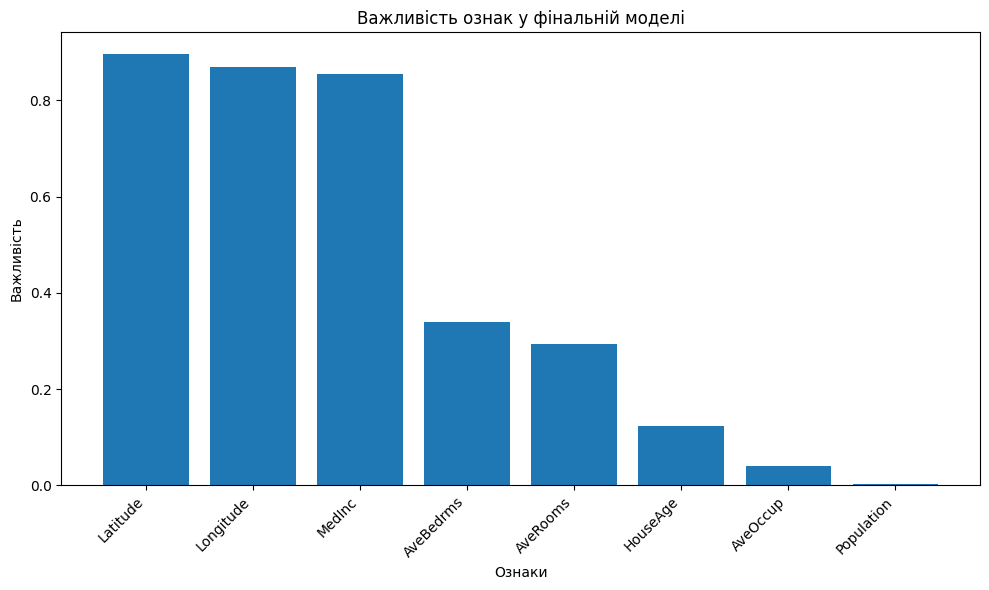

In [1]:
#Варіант 16

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_model = LinearRegression()
base_model.fit(X_train_scaled, y_train)

y_pred_train = base_model.predict(X_train_scaled)
y_pred_test = base_model.predict(X_test_scaled)

print("Базова модель:")
print(f"MSE (навчальна вибірка): {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"R^2 (навчальна вибірка): {r2_score(y_train, y_pred_train):.4f}")
print(f"MSE (тестова вибірка): {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R^2 (тестова вибірка): {r2_score(y_test, y_pred_test):.4f}")


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    return train_mse, test_mse, train_r2, test_r2

ridge_results = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test)
lasso_results = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test)

print("\nRidge регресія:")
print(f"MSE (навчальна вибірка): {ridge_results[0]:.4f}")
print(f"MSE (тестова вибірка): {ridge_results[1]:.4f}")
print(f"R^2 (навчальна вибірка): {ridge_results[2]:.4f}")
print(f"R^2 (тестова вибірка): {ridge_results[3]:.4f}")

print("\nLasso регресія:")
print(f"MSE (навчальна вибірка): {lasso_results[0]:.4f}")
print(f"MSE (тестова вибірка): {lasso_results[1]:.4f}")
print(f"R^2 (навчальна вибірка): {lasso_results[2]:.4f}")
print(f"R^2 (тестова вибірка): {lasso_results[3]:.4f}")

alphas = np.logspace(-4, 4, 50)
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    score = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append(np.mean(score))

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative MSE')
plt.title('Ridge regression: MSE vs. alpha')
plt.show()

optimal_alpha = alphas[np.argmax(ridge_scores)]
print(f"\nОптимальне значення alpha для Ridge регресії: {optimal_alpha:.4f}")

final_model = Ridge(alpha=optimal_alpha)
final_model.fit(X_train_scaled, y_train)
final_results = evaluate_model(final_model, X_train_scaled, X_test_scaled, y_train, y_test)

print("\nФінальна модель (Ridge з оптимальним alpha):")
print(f"MSE (навчальна вибірка): {final_results[0]:.4f}")
print(f"MSE (тестова вибірка): {final_results[1]:.4f}")
print(f"R^2 (навчальна вибірка): {final_results[2]:.4f}")
print(f"R^2 (тестова вибірка): {final_results[3]:.4f}")

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(final_model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ознаки')
plt.ylabel('Важливість')
plt.title('Важливість ознак у фінальній моделі')
plt.tight_layout()
plt.show()

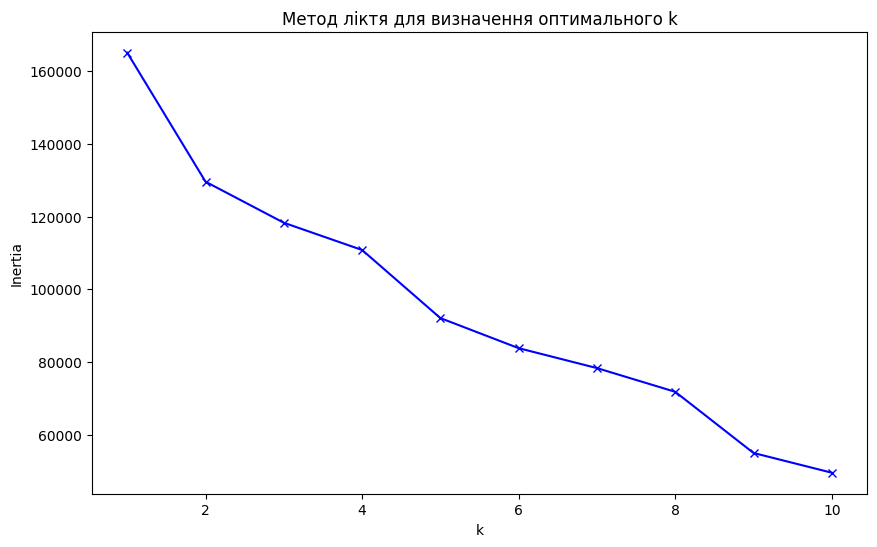

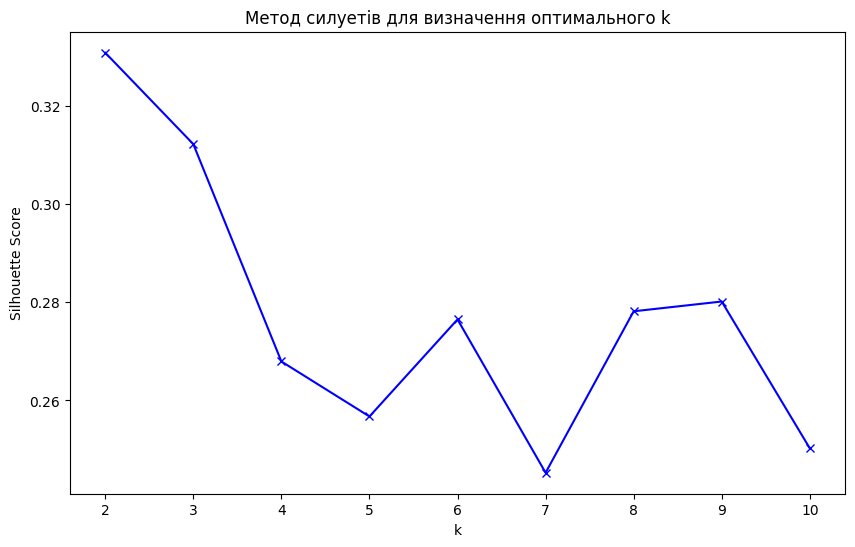

Оптимальна кількість кластерів за методом силуетів: 2


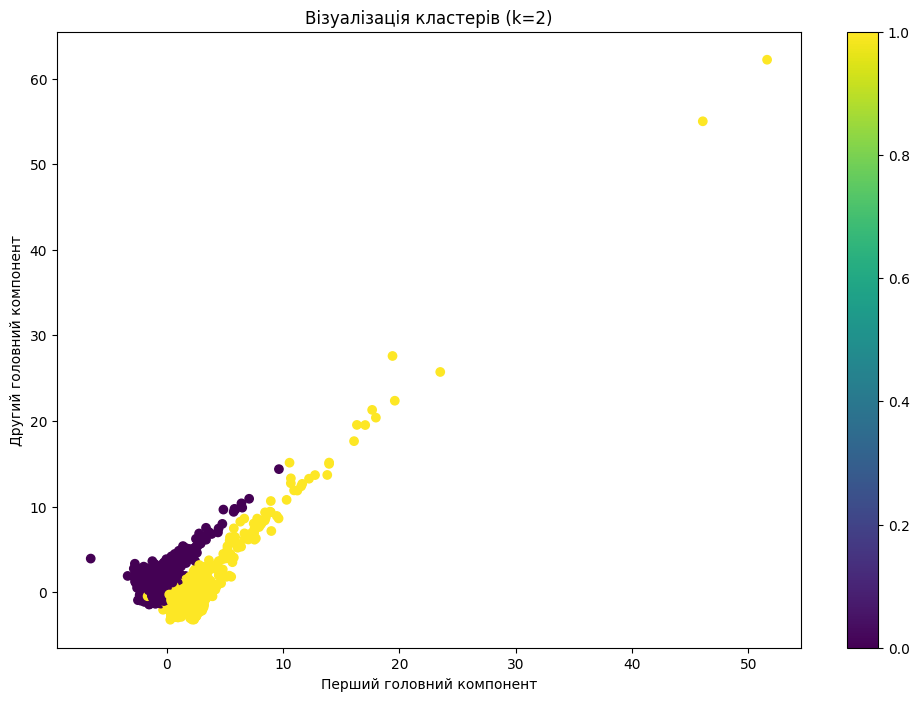


Середні значення ознак для кожного кластера:
           MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
Cluster                                                                  
0        0.024967 -0.018014 -0.082390  -0.044293    0.094279  0.002643   
1       -0.034423  0.024836  0.113591   0.061066   -0.129983 -0.003643   

         Latitude  Longitude  
Cluster                       
0       -0.789421   0.778448  
1        1.088377  -1.073249  


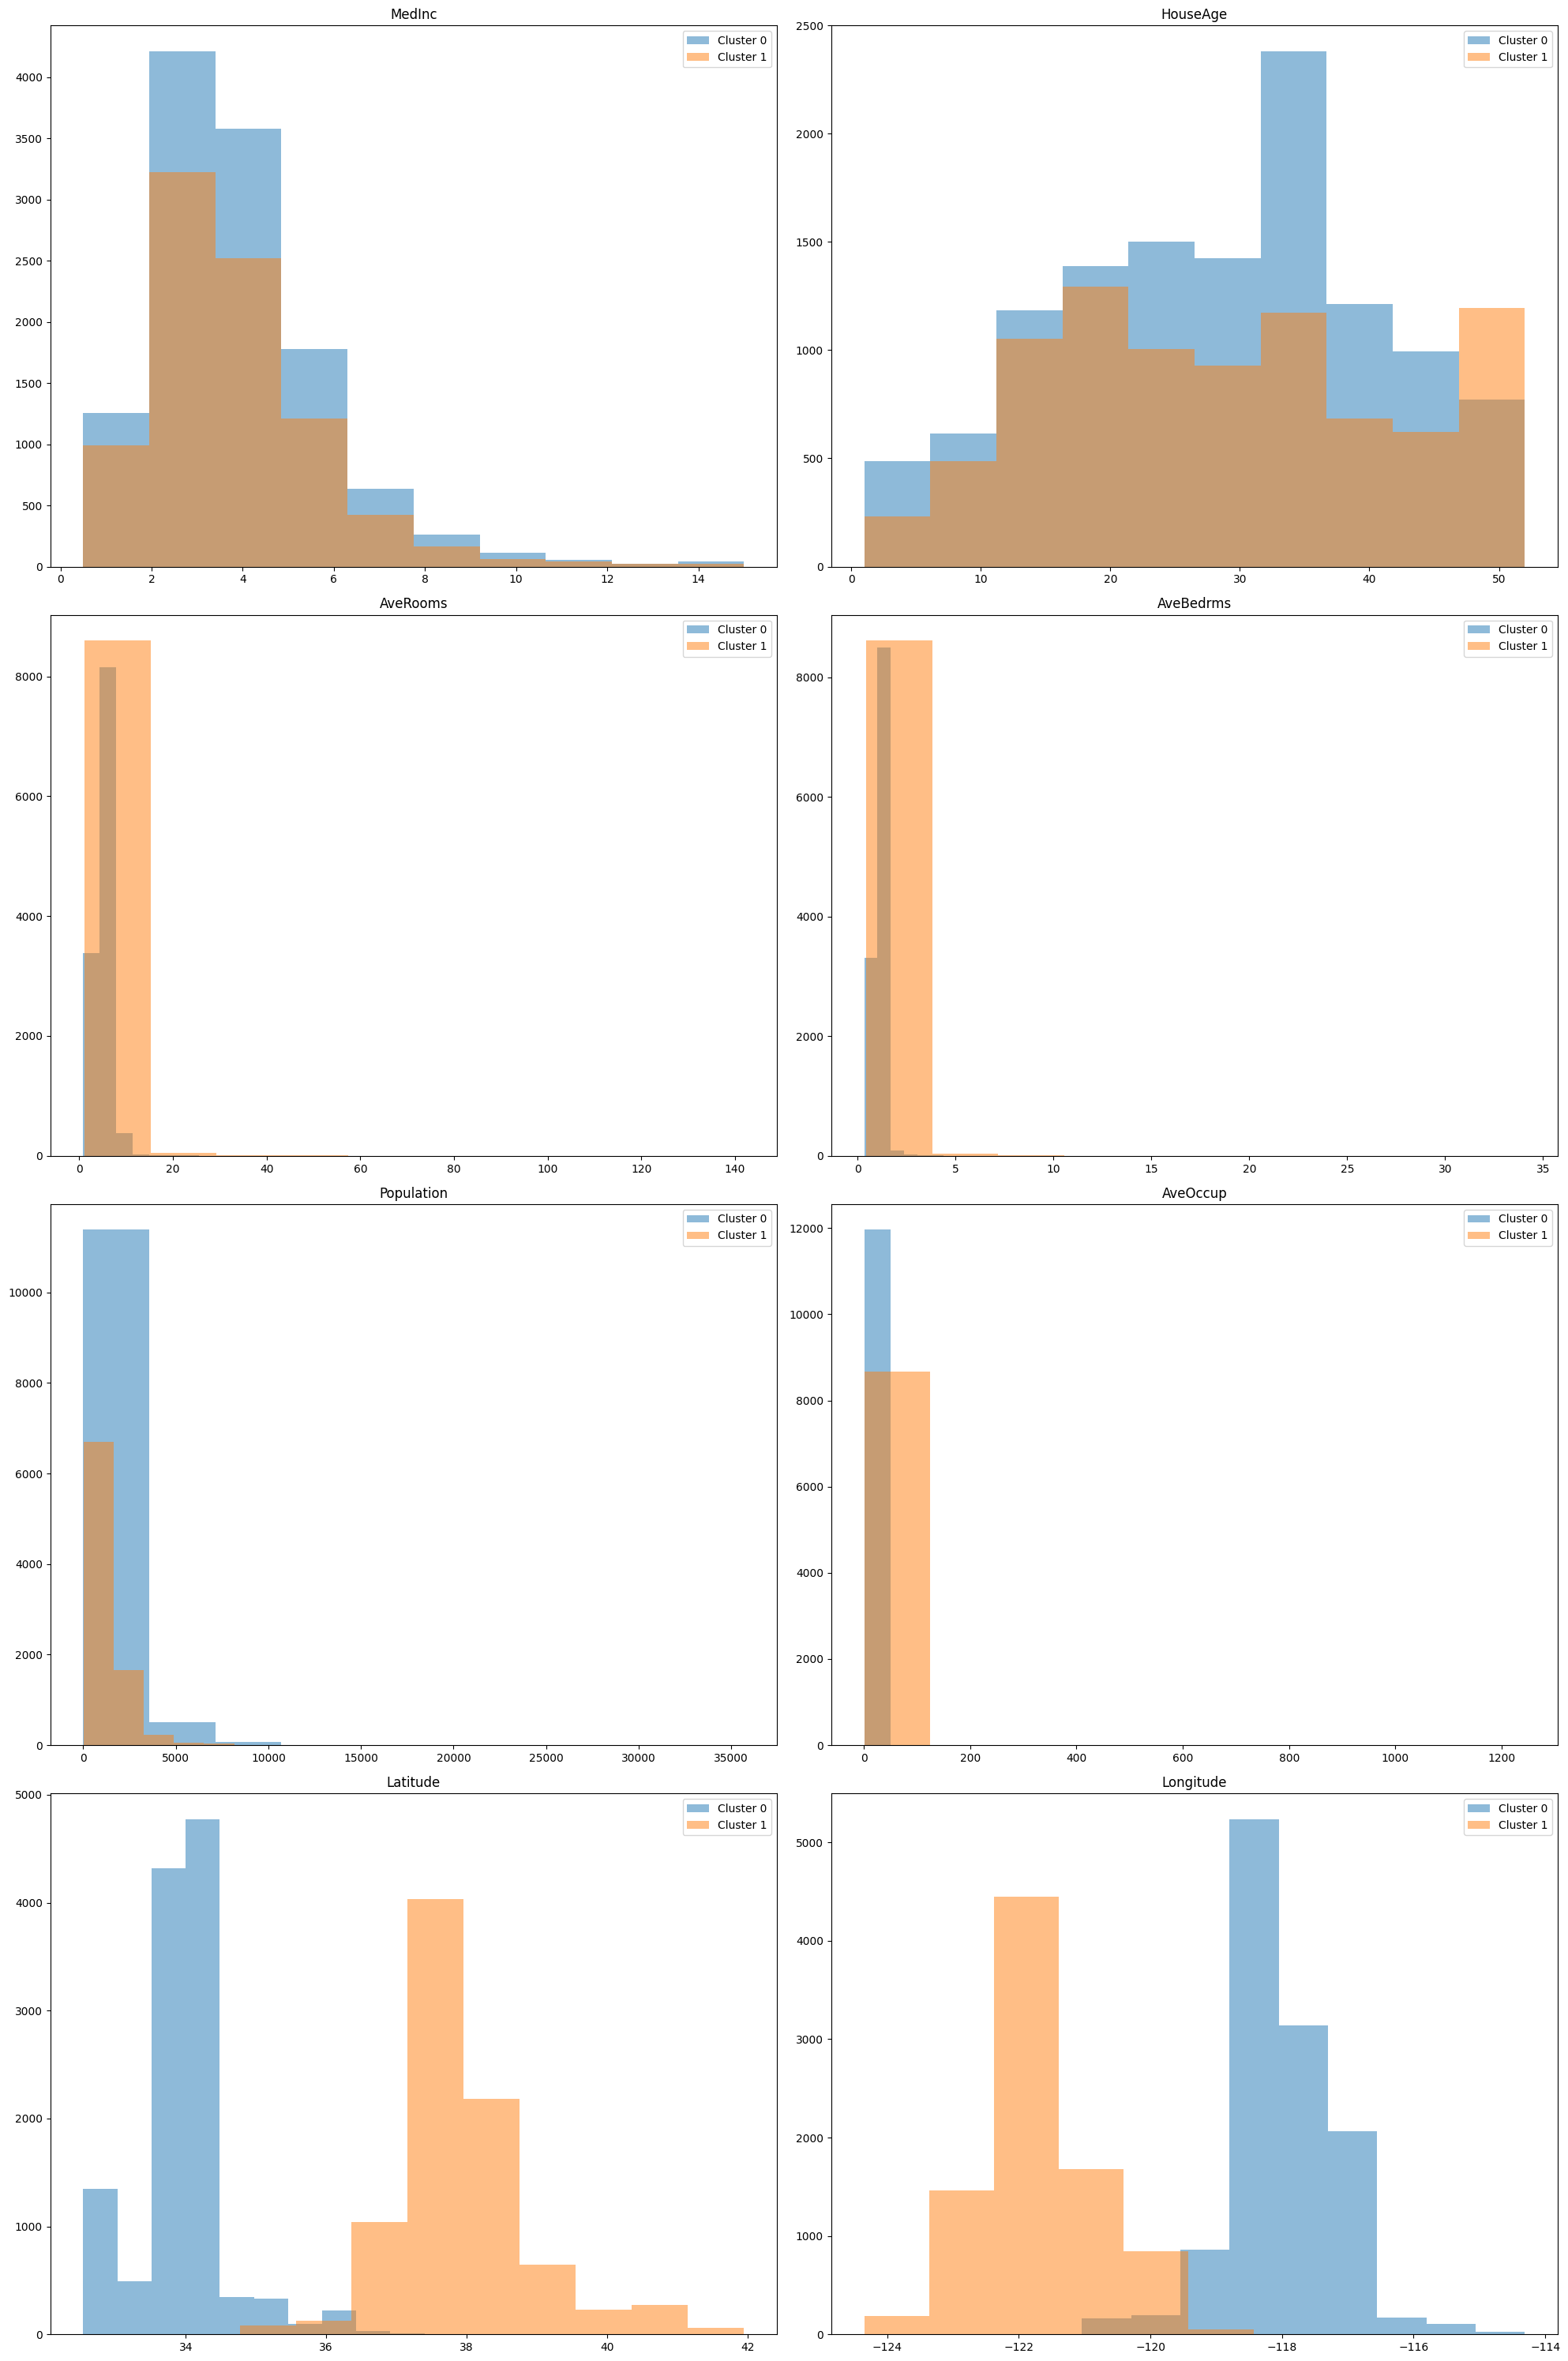

In [2]:
#Завдання 2 Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
#Зробити візуалізацію кластерів.
#Зробити висновки.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимального k')
plt.show()

silhouette_scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Метод силуетів для визначення оптимального k')
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  
print(f"Оптимальна кількість кластерів за методом силуетів: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title(f'Візуалізація кластерів (k={optimal_k})')
plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.show()

cluster_df = pd.DataFrame(X_scaled, columns=X.columns)
cluster_df['Cluster'] = cluster_labels

cluster_means = cluster_df.groupby('Cluster').mean()
print("\nСередні значення ознак для кожного кластера:")
print(cluster_means)

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.ravel()

for i, column in enumerate(X.columns):
    for cluster in range(optimal_k):
        axes[i].hist(X[column][cluster_labels == cluster], alpha=0.5, label=f'Cluster {cluster}')
    axes[i].set_title(column)
    axes[i].legend()

plt.tight_layout()
plt.show()